In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from tensorflow.keras.optimizers import Adam

In [29]:
iris = load_iris()
print(type(iris))
print('Data :', iris.data.shape)  # 4개씩 묶어서 150개의 자료가 들어있음 (?)
print('Label :', iris.target.shape)
print('iris datasets keys\n', iris.keys())

<class 'sklearn.utils.Bunch'>
Data : (150, 4)
Label : (150,)
iris datasets keys
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [30]:
x = iris.data
y = iris.target

encoder = OneHotEncoder(sparse=False)
y = y.reshape(-1, 1)
encoded_y = encoder.fit_transform(y)
print(encoded_y.shape)
print(encoded_y[50:55])
print(y[50:55])

(150, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[1]
 [1]
 [1]
 [1]
 [1]]


In [31]:
# 공부용, 시험용 데이터 덜어내고 나눠주기?
X_train, X_test, Y_train, Y_test = train_test_split(x, encoded_y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)


In [32]:
model = Sequential()
model.add(Dense(256, input_dim=4, activation='relu'))  # 차원 수 (???)
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))
# 클래스가 3개니까 마지막 출력도 3개, 마지막에 이진분류면 sigmoid, 다중분류면 softmax

In [33]:
# 아담은 제일 똑똑해서 learningRate를 별도 지정하지 않아도 되지만.. 주고싶을땐 지정 가능
# 대신 지정하려면 아담 객채를 만들어서 저렇게 지정해야된다고 함

opt = Adam(lr=0.001)  # 궁금하면 learningRate를 크게 작게 조절해보자
# 이 비율이 크면 최저점 찾기 위한 설정값 자체가 커서 좌우 와리가리 발산한다..
# 비율이 크면 발산하고, 너무 작으면 최저점 찾기 전에 학습이 끝나버릴 수 있음

model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               1280      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 1539      
Total params: 101,763
Trainable params: 101,763
Non-trainable params: 0
_________________________________________________________________


In [34]:
fit_hist = model.fit(X_train, Y_train, batch_size=5, epochs=50, verbose=1)

Epoch 1/50
24/24 [==============================] - 0s 706us/step - loss: 0.7006 - accuracy: 0.6750
Epoch 2/50
24/24 [==============================] - 0s 873us/step - loss: 0.3701 - accuracy: 0.8500
Epoch 3/50
24/24 [==============================] - 0s 831us/step - loss: 0.2294 - accuracy: 0.9333
Epoch 4/50
24/24 [==============================] - 0s 831us/step - loss: 0.1443 - accuracy: 0.9667
Epoch 5/50
24/24 [==============================] - 0s 706us/step - loss: 0.2934 - accuracy: 0.8750
Epoch 6/50
24/24 [==============================] - 0s 706us/step - loss: 0.1859 - accuracy: 0.9250
Epoch 7/50
24/24 [==============================] - 0s 706us/step - loss: 0.2888 - accuracy: 0.8750
Epoch 8/50
24/24 [==============================] - 0s 706us/step - loss: 0.2008 - accuracy: 0.9333
Epoch 9/50
24/24 [==============================] - 0s 873us/step - loss: 0.1235 - accuracy: 0.9500
Epoch 10/50
24/24 [==============================] - 0s 748us/step - loss: 0.2037 - accuracy: 0.9083

In [35]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Final test set accuracy :', score[1])  # 검증정확도가 얼마나 되는지

Final test set accuracy : 1.0


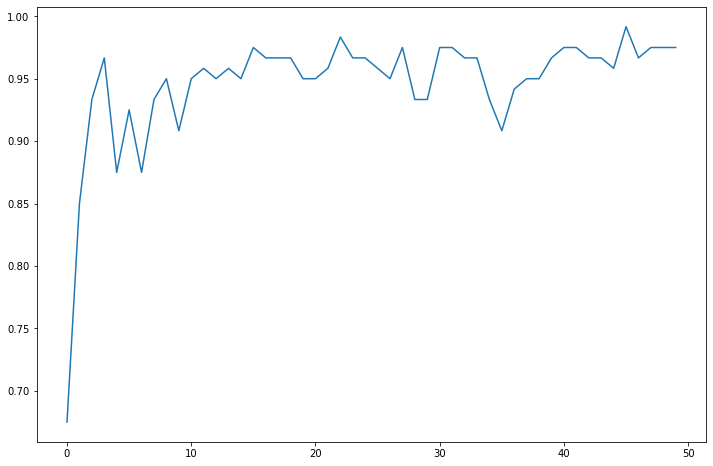

In [36]:
plt.plot(fit_hist.history['accuracy'])
plt.show()

In [72]:
my_sample = np.random.randint(30)
sample = X_test[my_sample]
print(sample)

sample = sample.reshape(-1, 4)
print(sample)  # 4차원이라 4개의 자료를 하나로 묶어서 줘야함

pred = model.predict(sample)
print('pred is :', pred)
print('actual is :', Y_test[my_sample])
print('Target :', iris.target_names[np.argmax(Y_test[my_sample])])

[6.3 2.7 4.9 1.8]
[[6.3 2.7 4.9 1.8]]
pred is : [[1.5400941e-04 9.5442966e-02 9.0440297e-01]]
actual is : [0. 0. 1.]
Target : virginica
